

# Project: Investigate  movies dataset from TMDB

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), which contains important information about 1000 movies like (budget, cast, relaes_date...etc) that will help us to investgate this data to get useful information.

##### questions to be answered from this data : 
 1- what is the relation between the budget and profit ?

 2-developing of runtime through the years.

3-developing of production budget over the years.

4-who is the most spending directors?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties
> this dataset is made from 10866 rows and 21 columns

> there are 13434 null values in these columns :
  (imdb_id, cast, homepage, director, tagline, keywords, overview, tagline, keywords, overview, genres, production_companies)

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.info()
df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

13434

In [4]:
df.duplicated().sum()

1


### Data Cleaning

>droping unuseful columns , duplicated rows and null values.

In [5]:
# removing rows with null values
df.dropna(axis = 0 , inplace = True)

df.shape

(1992, 21)

> we have now 1992 rows without null values, next step is to remove unused  and duplicated rows

In [6]:
df.drop(['imdb_id','cast','tagline','keywords','overview','vote_count','vote_average'] , axis = 1 , inplace = True)
df.drop_duplicates(inplace=True)

> converting budget, budget_adj and revenue_adj from float to int

In [7]:
df[['budget','budget_adj','revenue_adj']] = df[['budget','budget_adj','revenue_adj']].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   popularity            1992 non-null   float64
 2   budget                1992 non-null   int32  
 3   revenue               1992 non-null   int64  
 4   original_title        1992 non-null   object 
 5   homepage              1992 non-null   object 
 6   director              1992 non-null   object 
 7   runtime               1992 non-null   int64  
 8   genres                1992 non-null   object 
 9   production_companies  1992 non-null   object 
 10  release_date          1992 non-null   object 
 11  release_year          1992 non-null   int64  
 12  budget_adj            1992 non-null   int32  
 13  revenue_adj           1992 non-null   int32  
dtypes: float64(1), int32(3), int64(4), object(6)
memory usage: 210.1+ KB


In [8]:
df[['popularity']] = df[['popularity']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1992 non-null   int64 
 1   popularity            1992 non-null   int32 
 2   budget                1992 non-null   int32 
 3   revenue               1992 non-null   int64 
 4   original_title        1992 non-null   object
 5   homepage              1992 non-null   object
 6   director              1992 non-null   object
 7   runtime               1992 non-null   int64 
 8   genres                1992 non-null   object
 9   production_companies  1992 non-null   object
 10  release_date          1992 non-null   object
 11  release_year          1992 non-null   int64 
 12  budget_adj            1992 non-null   int32 
 13  revenue_adj           1992 non-null   int32 
dtypes: int32(4), int64(4), object(6)
memory usage: 202.3+ KB


> creating a new column which is the profit values

In [9]:
df.insert(11,'profit',df['revenue_adj']-df['budget_adj'])

In [10]:
df = df.query('budget_adj > 0')

In [11]:
df.to_csv('cleaned_data.csv' , index = False)

<a id='eda'></a>
## Exploratory Data Analysis



### 1- what is the relation between the budget and profit ?

In [15]:
def find_relation(col_x , col_y):
    #import the clean dataset
    clean_df = pd.read_csv('cleaned_data.csv')
    #setting graph size
    plt.figure(figsize=(6,6), dpi= 120)
    #plotting the relation graph
    plt.plot(clean_df.groupby(col_x)[col_y].sum())
    
    #getting the max and min values of x-axis 
    #maxval = df.groupby(col_x)[col_y].sum().idxmax()
    #minval = df.groupby(col_x)[col_y].sum().idxmin()
    return plt

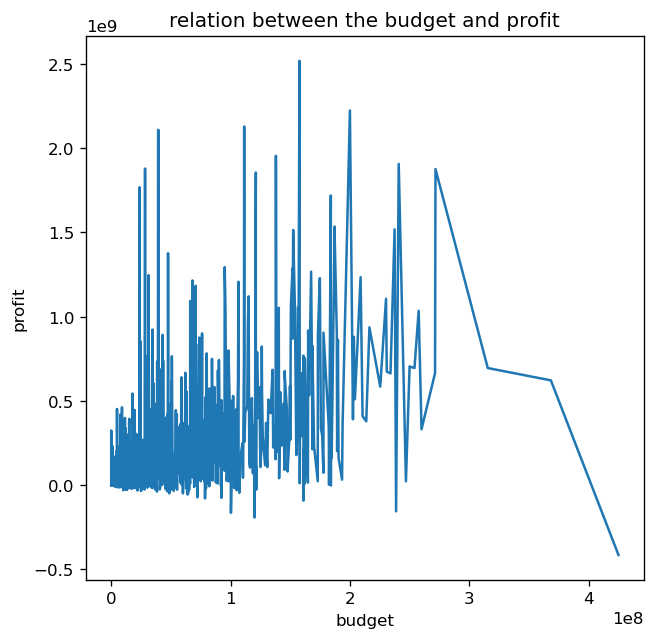

In [17]:
plt=find_relation('budget_adj','profit')

plt.title('relation between the budget and profit')
plt.xlabel('budget')
plt.ylabel('profit');



### 2-developing of production budget over the years

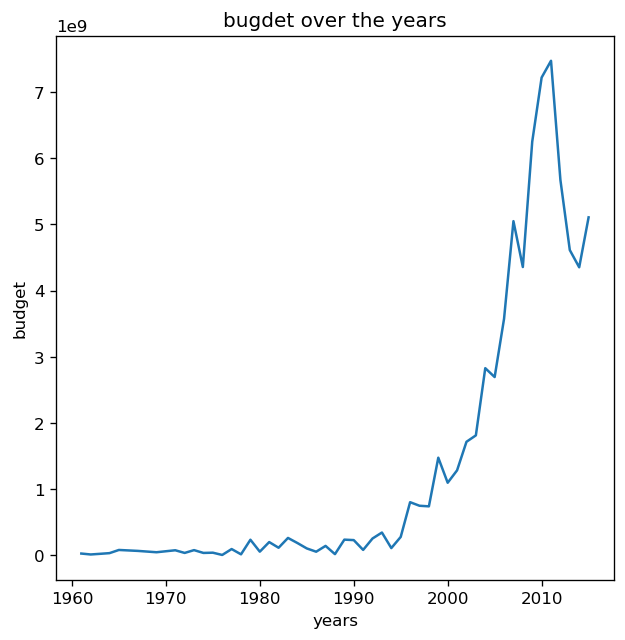

In [18]:
plt = find_relation('release_year','budget_adj')

plt.title('bugdet over the years')
plt.xlabel('years')
plt.ylabel('budget');



### 3-the development  of runtime through the years?

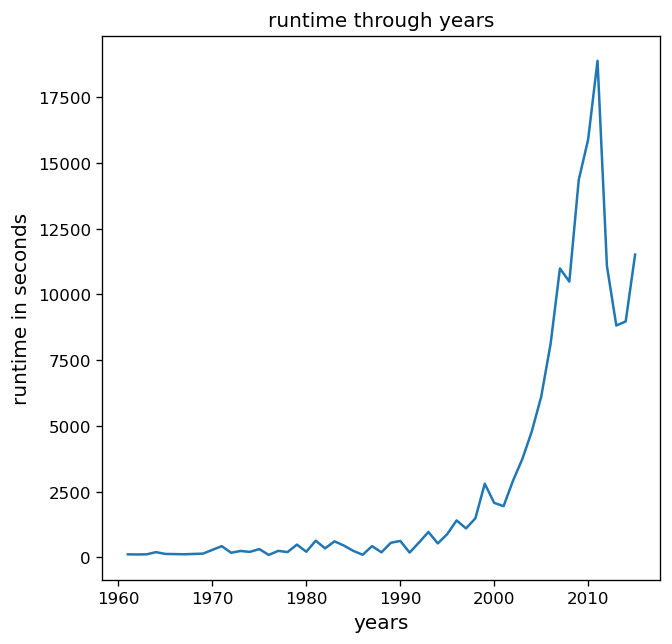

In [19]:
plt = find_relation('release_year','runtime')

plt.title("runtime through years", fontsize=12)
plt.xlabel('years',fontsize=12)
plt.ylabel('runtime in seconds' , fontsize = 12);

###  4- who is the most spending directors?

In [20]:
df_cleaned = pd.read_csv('cleaned_data.csv')

In [21]:
df_cleaned.budget_adj.describe()

count    1.445000e+03
mean     5.000507e+07
std      5.423265e+07
min      1.000000e+00
25%      1.114065e+07
50%      3.049201e+07
75%      7.089506e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [22]:
df_cleaned.budget_adj.nlargest(n = 6)

457     425000000
612     368371256
1217    315500574
952     271692064
1223    271330494
332     260000000
Name: budget_adj, dtype: int64

In [23]:
df_high = df_cleaned.query('budget_adj >= 271330494')

In [25]:
def find_directors(director,budget):
    
    plt.figure(figsize=(5,5), dpi= 120)
    
    df_high.groupby(director)[budget].sum().plot(kind='bar')
    
    max_v = df_high.groupby(director)[budget].sum().idxmax()
    return  max_v,plt

the most directors spending for budget is Sngmoo Lee


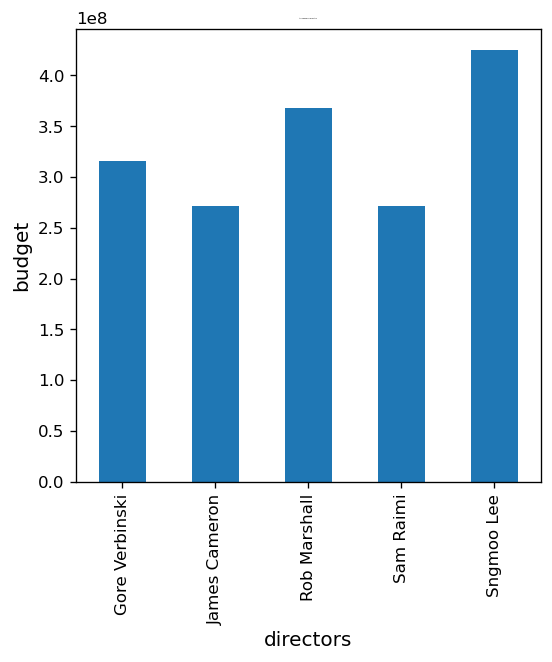

In [26]:
max_v , plt = find_directors('director','budget_adj');

plt.title("top spending directors", fontsize= 1)
plt.xlabel('directors',fontsize = 12)
plt.ylabel('budget', fontsize=12);
print('the most directors spending for budget is', max_v)

<a id='conclusions'></a>
## Conclusions

>We started this investigation by a dataset contains 10866 rows and 21 columns and we removed the rows with the null values and the duplicated rows. 

>Due to this investigation we were able to find the relation between the budget and profit and we found that it's not necessary to spend huge bugdet on the production to get high profit as we see that the cure goes down after rising the budget more than 300 millions dollars.

>We went through exploring the production budget over the years and we have found that the budget was nearly convergent until the statr of the 20 century then it started to rise so much until the last years also was the nearly the same results for the runtime of the movies as we have a relation between the budget and the runtime of the movies

>Not only this but we went to find who is the top five directors who spent money on the movies production and we found that the top five were : 
 1- Sngmoo Lee / 
 2- Rob Marshall / 
 3- Gore Verbinski /
 4- James Cameron /
 5- Sam Raimi

> Point to be taken that this results weren't very accurate due to the lackage of some values.